<a href="https://colab.research.google.com/github/aag112/911calls/blob/master/Updated911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/911.csv')

#1.What zip code had the most 911 calls?

In [ ]:
print('The top 10 zip codes with the most 911 calls were: \n', df['zip'].value_counts().head(10))

The top 10 zip codes with the most 911 calls were: 
 19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64


#2.Whats the most common call reason?

In [ ]:
print('The most common call reason was:\n',df['title'].value_counts().head(1))

The most common call reason was:
 Traffic: VEHICLE ACCIDENT -    23066
Name: title, dtype: int64


#3.Which town had the least amount of 911 calls?

In [ ]:
print('The town with the least amount of 911 calls was:\n',df['twp'].value_counts().tail(1))

The town with the least amount of 911 calls was:
 LEHIGH COUNTY    30
Name: twp, dtype: int64


#3b.What were the top 4 towns with the most amount of calls?

In [ ]:
print('The top four towns with the most amount of calls were:\n', pd.value_counts(df['twp']).iloc[:4])

The top four towns with the most amount of calls were:
 LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
Name: twp, dtype: int64


#Plot based on towns and how many calls were reported on each town

How Many Calls Were Reported In Each Town 
 AxesSubplot(0.125,0.125;0.775x0.755)


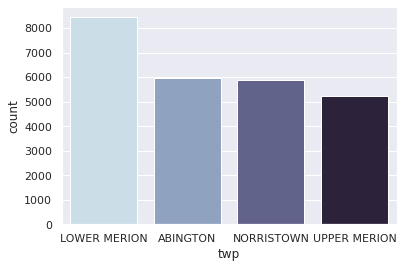

In [ ]:
print('How Many Calls Were Reported In Each Town \n', sns.countplot(x='twp', data=df,palette='ch:s=.25,rot=-.25', order=df.twp.value_counts().iloc[:4].index))

#4.What was the most recent 911 call?

In [ ]:
df['timeStamp'].max()
print('Our data shows that the most recent call was on: '+ str(df['timeStamp'].max()))

Our data shows that the most recent call was on: 2016-08-24 11:17:02


#5.How many 911 calls per year?

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
time = df['timeStamp'].iloc[0]

df['Year'] = df['timeStamp'].apply(lambda x: x.year)

print('The number of 911 calls per year:\n', df.groupby('Year').count()['twp'])

The number of 911 calls per year:
 Year
2015     7963
2016    91486
Name: twp, dtype: int64


In [ ]:
userInput = input("Please type a towns name: ")
print(f"The amount of calls in town {userInput.upper()} are {df[df.twp == userInput.upper()].shape[0]}")

Please type a towns name: Lower Merion
The amount of calls in town LOWER MERION are 8443


In [ ]:
df['timeStamp'].value_counts(normalize = True)

2015-12-10 17:40:01    0.00008
2016-04-21 17:57:01    0.00007
2015-12-23 14:12:01    0.00007
2015-12-23 16:07:01    0.00006
2016-03-09 19:07:01    0.00006
                        ...   
2016-01-17 15:37:00    0.00001
2016-06-18 03:46:00    0.00001
2016-08-21 13:32:01    0.00001
2016-05-25 17:47:00    0.00001
2016-02-07 01:17:01    0.00001
Name: timeStamp, Length: 72577, dtype: float64